
# Cost of Homes in California

This notebook trains a machine learning model that predicts home costs in California.

The overall objective is to predict the value of home prices using **9 feature variables and 1 target variable:**

#### **Feature Variables** ####

1.  **longitude:** A measure of how far west a house is (a higher value is farther west)
2.  **latitude:** A measure of how far north a house is (a higher value is farther north)
3.  **housingMedianAge:** Median age of a house within a block (a lower number is a newer building)
4.  **totalRooms:** Total number of rooms within a block
5.  **totalBedrooms:** Total number of bedrooms within a block
6.  **population:** Total number of people residing within a block
7.  **households:** Total number of households, a group of people residing within a home unit, for a block
8.  **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.  **oceanProximity:** Location of the house in proximity to the ocean

#### **Target Variable** ####
1.  **medianHouseValue:** Median house value for households within a block (measured in US Dollars)

Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering learning algorithms.


- pandas - To work with solid data-structures, n-dimensional matrices and perform exploratory data analysis.
- matplotlib - To visualize data using 2D plots.
- seaborn - To make 2D plots look pretty and readable.
- scikit-learn - To create machine learning models easily and make predictions.
- numpy - To work with arrays.
**A few things to note:**

- You'll need to install the various libraries before importing them ```(i.e. %pip install pandas)```
- You may need to restart the kernel to use updated packages.

In [149]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [202]:
# Read in the data with read_csv() into a Pandas Dataframe
housing_df = pd.read_csv('../data/raw/housing.csv')

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_df.info()

# Use .shape to understand how many observations (ie rows/records) of the dataset
# a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
# (row count, column count)
housing_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(20640, 10)

In [154]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Handle missing data

 Understand missing data that could skew the model


In [187]:
# Verify which features have missing values
print(housing_df.isnull().sum())

# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


1.002906976744186

In [209]:
 # Use imputation to handle missing data
from sklearn.impute import KNNImputer

housing_df = pd.read_csv('../data/raw/housing.csv')

# create a temporary copy of the dataset
temp = housing_df.copy()

# retrieve columns with numerical data (float64);
# will exclude the ocean_proximity column since the datatype is object;
columns_list = [col for col in housing_df.columns if temp[col].dtype != 'object']

columns_missing_data = [col for col in temp.loc[:, temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
temp = temp[columns_missing_data]

# Impute missing data using machine learning
knn = KNNImputer(n_neighbors=3)
knn.fit(temp) # train the model
values = knn.transform(temp) # transform the data using the model

# convert the array values to a dataframe with the appropriate column names
temp = pd.DataFrame(values, columns=columns_missing_data)

# now replace the missing values
for column in columns_missing_data:
    housing_df[column] = temp.replace(housing_df[column],housing_df[column])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Use visualizations to understand the relationship

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

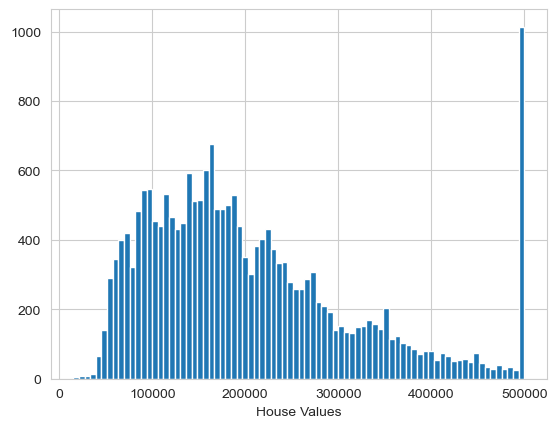

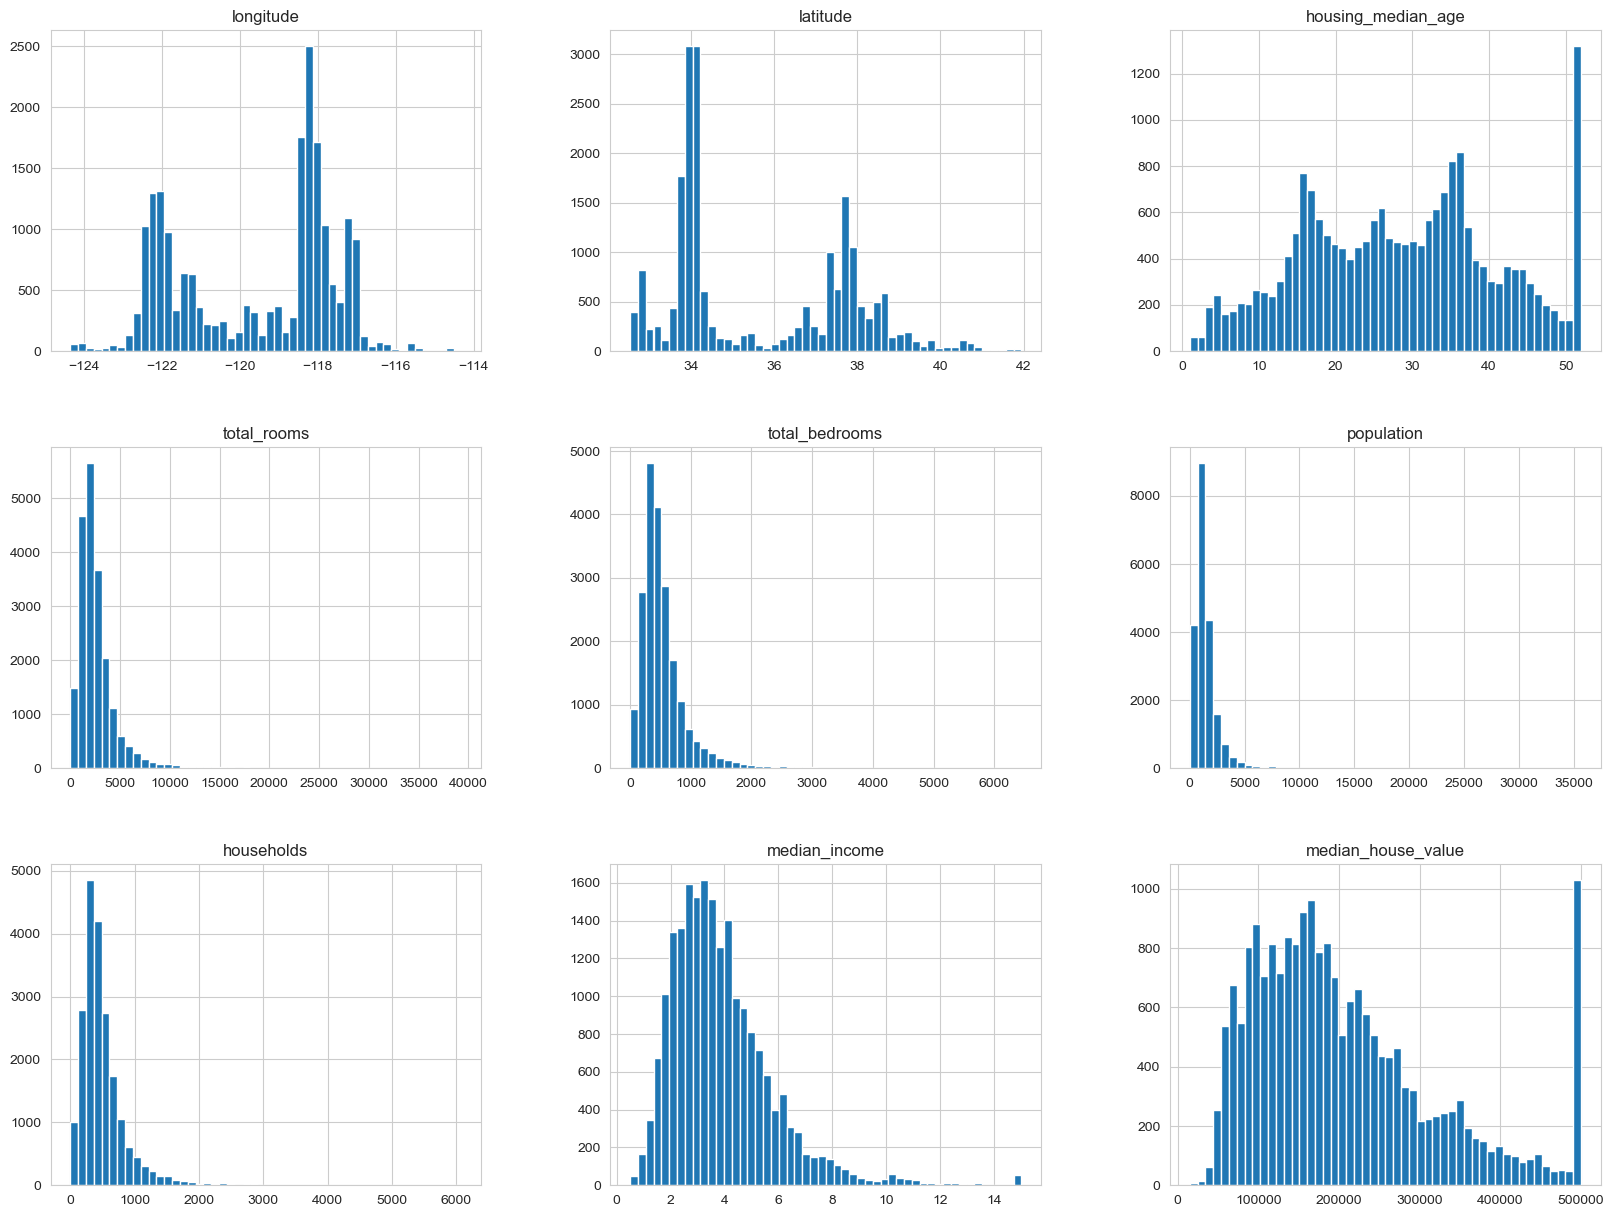

In [211]:
# Plot the distribution of the target variable (median_house_value) using a histogram

# bins->amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")


# We can see from the plot that the values of Median House Value are distributed normally with few outliers.
# Most of the house are around 100,000-200,000 range

# let's do histograms for the all the features to understand the data distributions
# using housing_df as to not plot the encoded values for OCEAN_PROXIMITY
housing_df.hist(bins=50, figsize=(20,15))

## Encode categorical data..

Most ML algorithms can only learn from numeric data (it's all Math) so categorical data must be encoded (i.e. converted) to numeric data

In [216]:
# Let's review our data types again; showing that ocean_proximity is the only categorical data
housing_df.info()

# housing_df.ocean_proximity.unique()
housing_df["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [225]:
# Let's review our data types again; showing that ocean_proximity is the only categorical data
# housing_df.info()

# print(pd.get_dummies(housing_df['ocean_proximity']))

# let's replace the OCEAN_PROXIMITY column using get_dummies()
encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
encoded.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   False   
4                      False                   False                   False   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                      True                       False  
1                      True                       False  
2                      True                       False  
3                      True                       False  
4                      True                       False

## Train the model

In [238]:
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase
# remove special characters as it could cause issues in the future
#  'ocean_proximity_ISLAND' -> ''
encoded.columns = [col.lower().replace(' ', '_').replace('<', '_') for col in encoded.columns]

# Split target variable and feature variables
y = encoded['median_house_value']
X = encoded[
    ['housing_median_age', 'median_income',
     # 'bedrooms_per_room','population_per_household','coords',
     'ocean_proximity__1h_ocean',
     'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']
]

# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs



       housing_median_age  median_income  ocean_proximity__1h_ocean  \
0                    41.0         8.3252                      False   
1                    21.0         8.3014                      False   
2                    52.0         7.2574                      False   
3                    52.0         5.6431                      False   
4                    52.0         3.8462                      False   
...                   ...            ...                        ...   
20635                25.0         1.5603                      False   
20636                18.0         2.5568                      False   
20637                17.0         1.7000                      False   
20638                18.0         1.8672                      False   
20639                16.0         2.3886                      False   

       ocean_proximity_inland  ocean_proximity_island  \
0                       False                   False   
1                       False    